## 모듈 import

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 

## 데이터셋 로드

In [34]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## copy

DataFrame을 **복제**합니다. 복제한 DataFrame을 수정해도 **원본에는 영향을 미치지 않습니다.**

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`copy()`로 DataFrame을 복제합니다.

In [36]:
df_copy = df.copy()

In [37]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`df_copy`의 `age`를 99999로 임의 수정하도록 하겠습니다.

In [38]:
df_copy.loc[0,"age"] = 99999

수정사항이 반영된 것을 확인할 수 있습니다.

In [39]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,99999.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


하지만, 원본 DataFrame의 **데이터는 변경되지 않고 그대로 남아** 있습니다.

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 결측치

결측치는 **비어있는 데이터**를 의미합니다.

결측치에 대한 처리는 매우 중요합니다. 

결측치에 대한 처리를 해주려면 **다음의 내용**을 반드시 알아야 합니다.

1. 결측 데이터 확인
2. 결측치가 **아닌** 데이터 확인
3. 결측 데이터 **채우기**
4. 결측 데이터 **제거하기**

## 결측치 확인 - isnull(), isna()

컬럼(column)별 결측치의 갯수를 확인하기 위해서는 `sum()` 함수를 붙혀주면 됩니다.

`sum()`은 Pandas의 통계 관련 함수이며, 통계 관련 함수는 추후에 더 자세히 알아볼 예정입니다.

**isnull()**

In [41]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**isna()**

isnull() 과 동작이 완전 같습니다. 편한 것으로 써주세요. (심지어 도큐먼트도 같습니다)

In [42]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

DataFrame 전체 결측 데이터의 갯수를 합산하기 위해서는 `sum()`을 두 번 사용하면 됩니다.

In [43]:
# 전체 결측 데이터의 개수를 확인합니다.
df.isnull().sum().sum()

869

## 결측치가 아닌 데이터 확인 - notnull()

`notnull()`은 `isnull()`과 정확히 **반대** 개념입니다.

In [44]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 결측 데이터 필터링

`isnull()` 함수가 결측 데이터를 찾는 **boolean index** 입니다.

즉, `loc`에 적용하여 조건 필터링을 걸 수 있습니다.

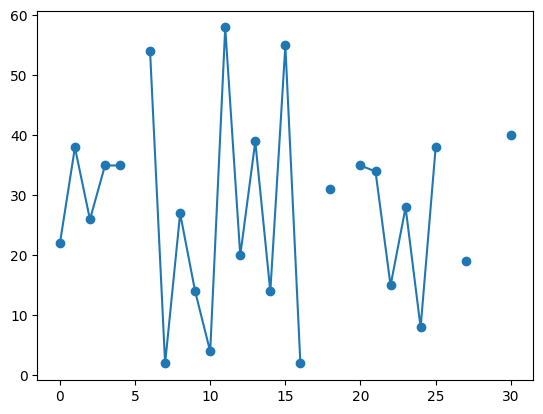

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df.loc[:30, "age"], marker="o")  # NaN을 포함하면 선이 끊김
plt.show()

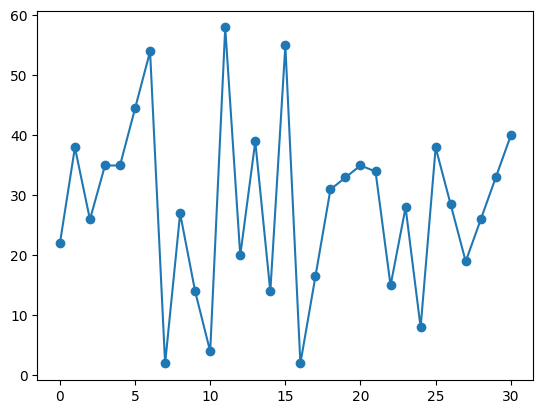

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df1.loc[:30, "age"], marker="o")  # NaN을 포함하면 선이 끊김
plt.show()

In [56]:
# df의 'age' 컬럼에 대해 결측치인 정보를 가져와 출력해 보세요.  (basic indexing, loc 사용)
df[df["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


## 결측치 채우기 - fillna()

`fillna()`를 활용하면 결측치에 대하여 **일괄적으로 값을 채울 수** 있습니다.

In [47]:
# 원본을 copy하여 df1 이름 붙이기
df1 = df.copy()

In [48]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [49]:
import pandas as pd
import numpy as np
from scipy import interpolate



# NaN이 아닌 값들의 인덱스와 해당 값만 선택
x = np.arange(len(df1))  # 전체 인덱스
mask = ~df1['age'].isna()  # NaN이 아닌 데이터 위치
x_valid = x[mask]  # 유효한 인덱스
y_valid = df1['age'][mask]  # 유효한 값

# 선형 보간 함수 생성
f = interpolate.interp1d(x_valid, y_valid, kind='linear', fill_value="extrapolate")

# 보간 적용
df1['age'] = f(x)

888번 index의 **결측치가 700으로 채워**진 것을 확인할 수 있습니다.

In [50]:
df1["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [22]:
# df1의 'age' 컬럼의 결측치를 700으로 채우기하여, 마지막 5개 데이터를 출력해 봅니다.
# df1["age"].fillna(700)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    700.0
889     26.0
890     32.0
Name: age, Length: 891, dtype: float64

In [45]:
# df1의 'age' 컬럼을 결측치가 700으로 채워진 내용으로 갱신합니다.
df1["age"] = df1["age"].fillna(700)

In [46]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,700.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**카테고리 형 데이터**을 채워주기 위해서는 다음과 같은 과정을 거쳐야 합니다.

이미 카테고리가 추가된 'A'나 'B'는 바로 fillna() 할 수 있습니다.

In [48]:
# df1의 'deck' 컬럼의 결측치를 'A'로 채우기합니다.  (갱신은 하지 않음)
df1['deck'].fillna('A')

0      A
1      C
2      A
3      C
4      A
      ..
886    A
887    B
888    A
889    C
890    A
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## 통계값으로 채우기

In [49]:
df1 = df.copy()

In [50]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### 평균으로 채우기

In [51]:
# df1의 'age'의 결측치를 df1의 'age' 평균값으로 채우기 하고, 마지막 5개의 데이터를 확인합니다.
df1["age"].fillna(df1["age"].mean())
df1.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### 중앙값으로 채우기

In [52]:
# df1의 'age'의 결측치를 df1의 'age' 중앙값으로 채우기 하고, 마지막 5개의 데이터를 확인합니다.
# df1의 'age'의 결측치를 df1의 'age' 평균값으로 채우기 하고, 마지막 5개의 데이터를 확인합니다.
df1["age"] = df1["age"].fillna(df1["age"].mean())
df1.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### 최빈값으로 채우기

In [53]:
# df1의 'deck'의 최빈값을 구하세요.
df1['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**최빈값(mode)**으로 채울 때에는 반드시 **0번째 index 지정**하여 값을 추출한 후 채워야 합니다.

In [54]:
# df1의 'deck'의 최빈값의 0번 인덱스를 지정하세요.
df1['deck'].mode()[0]

'C'

In [55]:
# df1의 'deck'의 결측치를 위의 값으로 채우고 마지막 5개 데이터를 조회하세요.
df1['deck'].fillna(df1['deck'].mode()[0]).tail()

886    C
887    B
888    C
889    C
890    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## NaN 값이 있는 데이터 제거하기 (dropna)

In [56]:
df1 = df.copy()

In [57]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


`dropna()`로 **1개 라도 NaN 값이 있는 행**은 제거할 수 있스빈다. (`how='any'`)

In [58]:
# df1에서 1개 라도 NaN 값이 있는 행을 제거합니다.
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


기본 옵션 값은 `how=any`로 설정되어 있으며, 다음과 같이 변경할 수 있습니다.

- **any**: 1개 라도 NaN값이 존재시 drop
- **all**: 모두 NaN값이 존재시 drop

In [59]:
df1.dropna(how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 연습문제

In [60]:
temp = pd.DataFrame({
    'A' : [np.nan,1,1,1,1],
    'B' : [np.nan,np.nan,2,2,2],
    'C' : [np.nan,np.nan,np.nan,3,3],
    'D' : [np.nan,np.nan,np.nan,np.nan,4],
    'E' : [np.nan,np.nan,np.nan,np.nan,np.nan]
})
temp

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN
2,1.0,2.0,NaN,NaN,NaN
3,1.0,2.0,3.0,NaN,NaN
4,1.0,2.0,3.0,4.0,NaN


In [61]:
temp.dropna(axis = 0, how = 'all')

,A,B,C,D,E
1,1.0,NaN,NaN,NaN,NaN
2,1.0,2.0,NaN,NaN,NaN
3,1.0,2.0,3.0,NaN,NaN
4,1.0,2.0,3.0,4.0,NaN


In [63]:
# 이상치 채우는 법

import pandas as pd
import numpy as np

# 예제 데이터 생성
df = pd.DataFrame({'age': [23, 25, 26, 30, 120, 28, 27, 35, 150, 29]})  # 120, 150이 이상치

# IQR 계산
Q1 = df['age'].quantile(0.25)  # 1사분위수 (25%)
Q3 = df['age'].quantile(0.75)  # 3사분위수 (75%)
IQR = Q3 - Q1  # IQR 계산

# 이상치 기준 설정 (1.5 * IQR 밖의 값)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐색
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outliers)

df['age'] = np.clip(df['age'], lower_bound, upper_bound)
print(df)

   age
4  120
8  150
   age
0   23
1   25
2   26
3   30
4   45
5   28
6   27
7   35
8   45
9   29


In [64]:
# 이상치 버리는 법
df_clean = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print(df_clean)

   age
0   23
1   25
2   26
3   30
4   45
5   28
6   27
7   35
8   45
9   29
